# K-means 

#### Selecting K with the elbow method

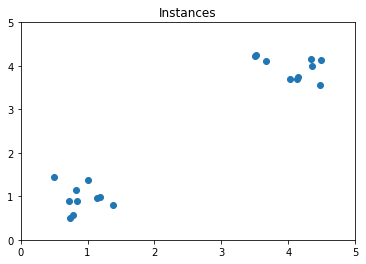

In [1]:
import numpy as np
import matplotlib.pyplot as plt

c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))
x = np.hstack((c1x, c2x))
y = np.hstack((c1y, c2y))
plt.scatter(x, y)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))
plt.title('Instances')
plt.show()

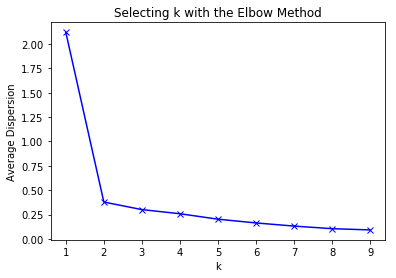

In [2]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

c1x = np.random.uniform(0.5, 1.5, (1, 10)) 
c1y = np.random.uniform(0.5, 1.5, (1, 10)) 
c2x = np.random.uniform(3.5, 4.5, (1, 10)) 
c2y = np.random.uniform(3.5, 4.5, (1, 10)) 
x = np.hstack((c1x, c2x)) 
y = np.hstack((c1y, c2y)) 
X = np.vstack((x, y)).T 

K = range(1, 10) 
meanDispersions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K, meanDispersions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average Dispersion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

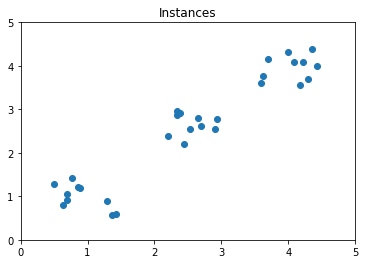

In [3]:
import numpy as np
import matplotlib.pyplot as plt

c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))
c3x = np.random.uniform(2.0, 3.0, (1, 10))
c3y = np.random.uniform(2.0, 3.0, (1, 10))
x = np.hstack((c1x, c2x, c3x))
y = np.hstack((c1y, c2y, c3y))
plt.scatter(x, y)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))
plt.title('Instances')
plt.show()

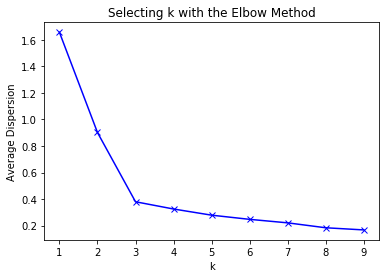

In [4]:
import numpy as np 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 

c1x = np.random.uniform(0.5, 1.5, (1, 10)) 
c1y = np.random.uniform(0.5, 1.5, (1, 10)) 
c2x = np.random.uniform(3.5, 4.5, (1, 10)) 
c2y = np.random.uniform(3.5, 4.5, (1, 10)) 
c3x = np.random.uniform(2.0, 3.0, (1, 10))
c3y = np.random.uniform(2.0, 3.0, (1, 10))
x = np.hstack((c1x, c2x, c3x))
y = np.hstack((c1y, c2y, c3y))
X = np.vstack((x, y)).T 

K = range(1, 10) 
meanDispersions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K, meanDispersions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average Dispersion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

# Evaluating clusters

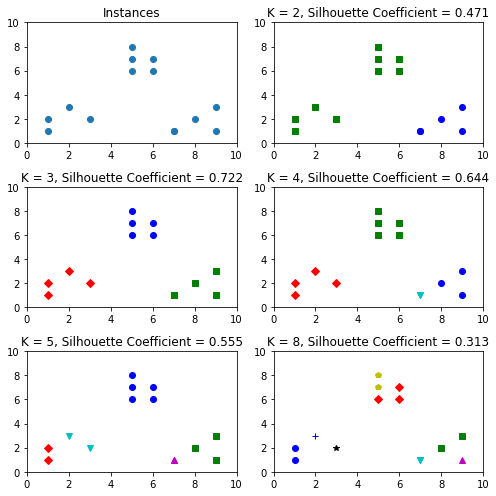

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')   
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.xticks(np.arange(0, 12, 2))
    plt.yticks(np.arange(0, 12, 2))
    plt.title('K = %s, Silhouette Coefficient = %.03f' % (
        t, metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))
    plt.tight_layout()
plt.show()

# Image quantization

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

# First we read and flatten the image. 
original_img = np.array(Image.open('tree.jpg'), dtype=np.float64) / 255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

In [7]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
cluster_assignments = estimator.predict(image_flattened)

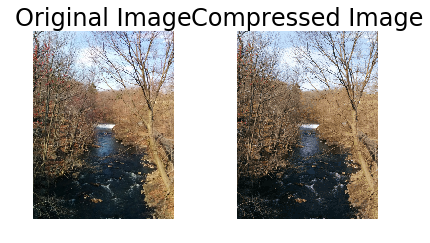

In [9]:
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

plt.subplot(121)
plt.title('Original Image', fontsize=24)
plt.imshow(original_img)
plt.axis('off')
plt.subplot(122)
plt.title('Compressed Image', fontsize=24)
plt.imshow(compressed_img)
plt.axis('off')
plt.tight_layout()
plt.show()

# Clustering to learn features

In [14]:
import numpy as np
import mahotas as mh
from mahotas.features import surf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans
import glob
import os

In [15]:
all_instance_filenames = []
all_instance_targets = []

for f in glob.glob('cats-and-dogs-img/*.jpg'):
    target = 1 if 'cat' in os.path.split(f)[1] else 0
    all_instance_filenames.append(f)
    all_instance_targets.append(target)

surf_features = []
for f in all_instance_filenames:
    image = mh.imread(f, as_grey=True)
    surf_features.append(surf.surf(image)[:, 5:])
    
train_len = int(len(all_instance_filenames) * .60)
X_train_surf_features = np.concatenate(surf_features[:train_len])
X_test_surf_feautres = np.concatenate(surf_features[train_len:])
y_train = all_instance_targets[:train_len]
y_test = all_instance_targets[train_len:]

In [16]:
n_clusters = 300
estimator = MiniBatchKMeans(n_clusters=n_clusters)
estimator.fit_transform(X_train_surf_features)

array([[ 3.64447308,  1.67643831,  1.07165137, ...,  2.5870558 ,
         3.38610486,  2.68217617],
       [ 3.60608759,  1.6429048 ,  1.03729628, ...,  2.5780944 ,
         3.3430554 ,  2.66452623],
       [ 2.95716623,  1.01053214,  0.62769103, ...,  3.27322334,
         2.68186968,  3.35947443],
       ..., 
       [ 4.05771025,  2.32541403,  1.61617155, ...,  2.3932954 ,
         3.91491455,  2.47445441],
       [ 5.12885529,  3.18884972,  2.47385997, ...,  1.12778407,
         4.89520442,  1.21588561],
       [ 0.64694804,  2.18913287,  2.78154401, ...,  6.12260532,
         0.82597129,  6.19598615]])

In [17]:
X_train = []
for instance in X_train_surf_features[:train_len]:
    clusters = estimator.predict(instance.reshape(1,-1))
    features = np.bincount(clusters)
    if len(features) < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-len(features))))
    X_train.append(features)

X_test = []
for instance in X_test_surf_feautres[train_len:]:
    clusters = estimator.predict(instance.reshape(1,-1))
    features = np.bincount(clusters)
    if len(features) < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-len(features))))
    X_test.append(features)

In [4]:
X_train = []
for instance in surf_features[:train_len]:
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if len(features) < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-len(features))))
    X_train.append(features)
    
X_test = []
for instance in surf_features[train_len:]:
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if len(features) < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-len(features))))
    X_test.append(features)   

ValueError: Found array with 0 sample(s) (shape=(0, 65)) while a minimum of 1 is required.

In [18]:
clf = LogisticRegression(C=0.001, penalty='l2')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

SyntaxError: invalid syntax (<ipython-input-18-6ae739ee5270>, line 3)

In [9]:
print(classification_report(y_test, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [800, 521065]